In [1]:
import os
from pathlib import Path
import sys
import os
import _pickle as pickle
import json
import copy 
import pandas
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_pdf import PdfPages
import csv
import json
from collections import Counter
import statistics 

In [2]:
with open('../responseJudgement.json') as json_file:
    judgements = json.load(json_file)

In [3]:
judgements[0]

{'HITId': '367O8HRHKIEQRLKL1GF6UGQ0U1AS4P',
 'HITTypeId': '3EAC8D5G64G8Y75P7FXTSOT4QKK6OX',
 'AssignmentId': '3QFUFYSY91LJA0DTMYK9C027UJ4F4Z',
 'WorkerId': 'A11Q8U6QTT8KGF',
 'WorkTimeInSeconds': '187',
 'Input.fileName': '20200326-232737_267_live.pkl.json',
 'Input.localIndex': '21',
 'Input.contextLen': '2',
 'Input.fileIndex': '27',
 'Answer.Correctness.Agree': 'false',
 'Answer.Correctness.Disagree': 'true',
 'Answer.Correctness.Neutral': 'false',
 'Answer.Correctness.Strongly Agree': 'false',
 'Answer.Correctness.Strongly Disagree': 'false',
 'Answer.Fluent.Agree': 'true',
 'Answer.Fluent.Disagree': 'false',
 'Answer.Fluent.Neutral': 'false',
 'Answer.Fluent.Strongly Agree': 'false',
 'Answer.Fluent.Strongly Disagree': 'false',
 'Answer.Interestingness.Agree': 'true',
 'Answer.Interestingness.Disagree': 'false',
 'Answer.Interestingness.Neutral': 'false',
 'Answer.Interestingness.Strongly Agree': 'false',
 'Answer.Interestingness.Strongly Disagree': 'false',
 'Answer.Logical.Agree

In [4]:
responseSet = {}

for root, dirs, files in os.walk("../clean"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    currFileName = data['currentFileName']
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        uniqueStr = 'fileIndex=' + str(context['fileIndex']) + '&&contextLen=' + str(context['contextLen']) + '&&userResponse=' + context['userResponse'].strip()
                        
                        if(uniqueStr in responseSet):
                            continue
                        
                        else:
                            
                            foundMatches = [x for x in judgements if x['Input.contextLen'] == str(context['contextLen']) and x['Input.fileIndex'] == str(context['fileIndex'])]
                            foundJudgement = [x for x in foundMatches if x['Input.fileName'] == currFileName and x['Input.localIndex'] == str(context['localIndex'])]
                            
                            if(len(foundJudgement) > 0):
                                responseSet[uniqueStr] = foundJudgement
                        
                except Exception as e: print(e)

In [5]:
Qualtype = 'Logical'
metric = {
    'Answer.' + Qualtype +'.Strongly Disagree': 1,
    'Answer.' + Qualtype +'.Disagree': 2,
    'Answer.' + Qualtype +'.Neutral': 3,
    'Answer.' + Qualtype +'.Agree': 4,
    'Answer.' + Qualtype +'.Strongly Agree': 5
}

In [6]:
scores1 = []

for root, dirs, files in os.walk("../clean/Setting 1"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        
                        userResponse = context['userResponse']
                        fileIndex = context['fileIndex']
                        contextLen = context['contextLen']
                        
                        identifierStr = 'fileIndex=' + str(fileIndex) + '&&contextLen=' + str(contextLen) + '&&userResponse=' + userResponse.strip()
                        
                        responseJudgements =  responseSet[identifierStr]
                        
                        currFeedback = []
                        for feedback in responseJudgements:
                            for key in feedback:
                                
                                if('Answer.' + Qualtype in key and feedback[key] == 'true'):
                                    currFeedback.append(metric[key])
                        
                        scores1.append(statistics.mean(currFeedback))
                            
                        
                    
                except Exception as e: print(e)                 

In [7]:
scores2 = []

for root, dirs, files in os.walk("../clean/Setting 2"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        
                        userResponse = context['userResponse']
                        fileIndex = context['fileIndex']
                        contextLen = context['contextLen']
                        
                        identifierStr = 'fileIndex=' + str(fileIndex) + '&&contextLen=' + str(contextLen) + '&&userResponse=' + userResponse.strip()
                        
                        responseJudgements =  responseSet[identifierStr]
                        
                        currFeedback = []
                        for feedback in responseJudgements:
                            for key in feedback:
                                
                                if('Answer.' + Qualtype in key and feedback[key] == 'true'):
                                    currFeedback.append(metric[key])
                        
                        scores2.append(statistics.mean(currFeedback))
                            
                        
                    
                except Exception as e: print(e)                 

In [8]:
scores3 = []

for root, dirs, files in os.walk("../clean/Setting 3"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        
                        userResponse = context['userResponse']
                        fileIndex = context['fileIndex']
                        contextLen = context['contextLen']
                        
                        identifierStr = 'fileIndex=' + str(fileIndex) + '&&contextLen=' + str(contextLen) + '&&userResponse=' + userResponse.strip()
                        
                        responseJudgements =  responseSet[identifierStr]
                        
                        currFeedback = []
                        for feedback in responseJudgements:
                            for key in feedback:
                                
                                if('Answer.' + Qualtype in key and feedback[key] == 'true'):
                                    currFeedback.append(metric[key])
                        
                        scores3.append(statistics.mean(currFeedback))
                            
                        
                    
                except Exception as e: print(e)                 

In [9]:
scores4 = []

for root, dirs, files in os.walk("../clean/Setting 4"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        
                        userResponse = context['userResponse']
                        fileIndex = context['fileIndex']
                        contextLen = context['contextLen']
                        
                        identifierStr = 'fileIndex=' + str(fileIndex) + '&&contextLen=' + str(contextLen) + '&&userResponse=' + userResponse.strip()
                        
                        responseJudgements =  responseSet[identifierStr]
                        
                        currFeedback = []
                        for feedback in responseJudgements:
                            for key in feedback:
                                
                                if('Answer.' + Qualtype in key and feedback[key] == 'true'):
                                    currFeedback.append(metric[key])
                        
                        scores4.append(statistics.mean(currFeedback))
                            
                        
                    
                except Exception as e: print(e)                 

In [10]:
scores5 = []

for root, dirs, files in os.walk("../clean/Setting 5"):
    for file in files:
        if file.endswith(".json"):
            fileName = os.path.join(root, file)
            with open(fileName) as json_file:
                try:
                    data = json.load(json_file)
                    dialogs = data['dialogs']
                    
                    for i in range(1, len(dialogs)):
                        context = dialogs[i]['context']
                        
                        userResponse = context['userResponse']
                        fileIndex = context['fileIndex']
                        contextLen = context['contextLen']
                        
                        identifierStr = 'fileIndex=' + str(fileIndex) + '&&contextLen=' + str(contextLen) + '&&userResponse=' + userResponse.strip()
                        
                        responseJudgements =  responseSet[identifierStr]
                        
                        currFeedback = []
                        for feedback in responseJudgements:
                            for key in feedback:
                                
                                if('Answer.' + Qualtype in key and feedback[key] == 'true'):
                                    currFeedback.append(metric[key])
                        
                        scores5.append(statistics.mean(currFeedback))
                            
                        
                    
                except Exception as e: print(e)                 

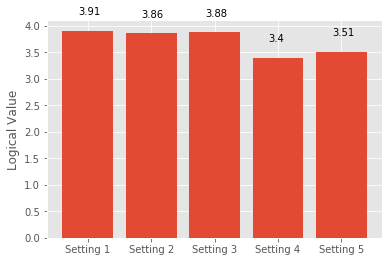

In [11]:
%matplotlib inline
plt.style.use('ggplot')

x = ['Setting 1', 'Setting 2', 'Setting 3', 'Setting 4', 'Setting 5']
counts = [round(statistics.mean(scores1), 2), round(statistics.mean(scores2), 2), round(statistics.mean(scores3), 2), round(statistics.mean(scores4), 2), round(statistics.mean(scores5), 2)]


x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, counts)
#plt.xlabel("Setting")
plt.ylabel("Logical Value")
#plt.title("Energy output from various fuel sources")

plt.xticks(x_pos, x)

for i, v in enumerate(counts):
    plt.text(x_pos[i] - 0.15, v + 0.3 , str(v))
    
plt.show()